In [1]:
! pip install -r requirements.txt

In [2]:
import pandas as pd

In [3]:
pd.read_csv('data/data_ex_1.csv')

,hiver_2015,hiver_2016,permeabilite_sol,resistance,au_dessus_60e_parallele
0,-41.348798,-10.681830,10.347281,0.803157,oui
1,-36.308328,-8.560263,13.431760,-1.307157,oui
2,-35.706947,-7.980804,9.855522,1.370246,oui
3,-35.223401,-9.267870,12.179208,-1.410446,oui
4,-34.314026,-7.435060,9.916977,1.381773,oui
...,...,...,...,...,...
10000,29.546015,-32.064545,13.841706,-1.379053,non
10001,32.959369,-31.666073,12.411507,-1.257224,oui
10002,36.595877,-30.880099,12.206561,-0.713427,oui
10003,34.372637,-29.276130,9.132106,0.858851,non


# Mise en place et évaluation d’un modèle

<font color=red>_L’ordre n’a pas d’importance, ce n’est pas grave non plus de ne pas finir toutes les parties._</font>


##  <u>1ère Partie :</u> Prédiction de la position d’une ville à partir de données météo

L’objectif de cet exercice est d’essayer de prédire si une ville se trouve au-dessus ou en dessous du 60ème parallèle en fonction des relevés de température et de précipitation en hiver 2015 et 2016.<br/><br/>
Pour cela charger le fichier data\data_ex_1.csv<br/><br/>
Les trois questions devront être traitées par un modèle génératif et par un modèle discriminant.


In [126]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### a.	Faire une première version des modèles permettant de classer les villes en prenant toutes les données.

Afficher le taux d’erreur

In [127]:
df = pd.read_csv('data/data_ex_1.csv')

In [128]:
df.shape

(10005, 5)

In [129]:
df.describe()

,hiver_2015,hiver_2016,permeabilite_sol,resistance
count,10005.000000,10005.000000,10005.000000,10005.000000
mean,-0.030879,0.028269,9.971180,0.010065
std,11.757130,10.473917,2.000317,1.001286
min,-41.348798,-32.064545,1.981313,-1.412965
25%,-10.014113,-9.974522,8.644148,-0.977628
50%,4.490410,-0.669373,9.964732,0.078175
75%,10.033700,10.069427,11.299027,0.986635
max,36.595877,21.095863,17.483177,1.413435


In [130]:
df.isnull().sum()

hiver_2015                 0
hiver_2016                 0
permeabilite_sol           0
resistance                 0
au_dessus_60e_parallele    0
dtype: int64

In [131]:
df.dtypes

hiver_2015                 float64
hiver_2016                 float64
permeabilite_sol           float64
resistance                 float64
au_dessus_60e_parallele     object
dtype: object

<AxesSubplot:>

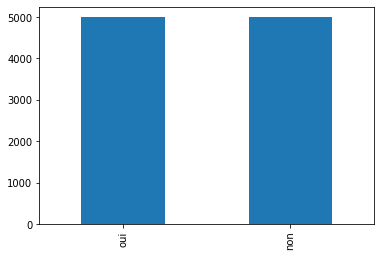

In [132]:
df['au_dessus_60e_parallele'].value_counts().plot(kind="bar")

In [133]:
df['au_dessus_60e_parallele_binaire'] = df['au_dessus_60e_parallele'].map(lambda x: 1 if x=='oui' else 0)

In [134]:
data = df.drop("au_dessus_60e_parallele",axis=1)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,data.columns!='au_dessus_60e_parallele_binaire'], 
                                                    data['au_dessus_60e_parallele_binaire'], test_size=0.2, 
                                                    random_state=42)

In [136]:
models = {
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier()
}

In [137]:
scores_cv = []
for model in models:
    scores_cv.append(cross_val_score(models[model], X_train, y_train, cv=5,).mean())

In [138]:
print("Taux d'erreur cross validation sur le train set:")
for i,model in enumerate(models):
    print(f"{model} : {round(1 - scores_cv[i],3)}")

Taux d'erreur cross validation sur le train set:
Logistic Regression : 0.0
Random Forest : 0.0


In [139]:
print("Taux d'erreur sur le test set:")
for model in models:
    model_fit = models[model].fit(X_train,y_train)
    y_pred = model_fit.predict(X_test)
    print(f"{model} : {round(1 - accuracy_score(y_test, y_pred),3)}")

Taux d'erreur sur le test set:
Logistic Regression : 0.001
Random Forest : 0.0


### b.	Essayer d’améliorer les modèles en identifiant les variables non pertinentes

Afficher le taux de bonne prédiction

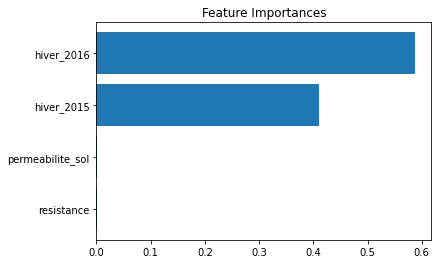

In [140]:
rdf = RandomForestClassifier().fit(X_train,y_train)
features = X_train.columns
importances = rdf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()

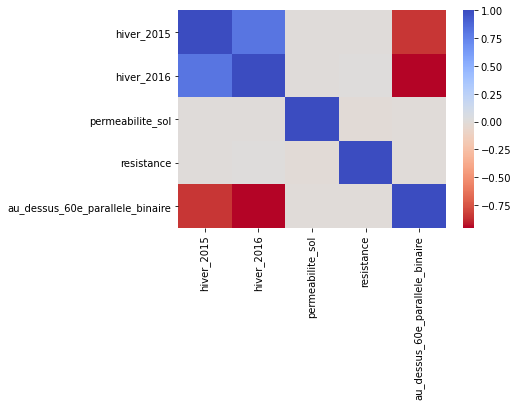

In [141]:
rs = np.random.RandomState(0)
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r')
plt.show()

In [142]:
data.columns

Index(['hiver_2015', 'hiver_2016', 'permeabilite_sol', 'resistance',
       'au_dessus_60e_parallele_binaire'],
      dtype='object')

In [143]:
data1 = data.drop(['permeabilite_sol', 'resistance'],axis=1)

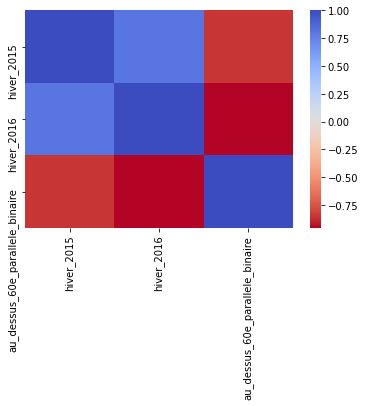

In [144]:
rs = np.random.RandomState(0)
corr = data1.corr()
sns.heatmap(corr, cmap='coolwarm_r')
plt.show()

In [145]:
X_train, X_test, y_train, y_test = train_test_split(data1.iloc[:,data1.columns!='au_dessus_60e_parallele_binaire'], 
                                                    data1['au_dessus_60e_parallele_binaire'], test_size=0.2, 
                                                    random_state=42)

In [146]:
scores_cv = []
for model in models:
    scores_cv.append(cross_val_score(models[model], X_train, y_train, cv=5,).mean())

In [147]:
print("Accuracy moyenne cross validation sur le train:")
for i,model in enumerate(models):
    print(f"{model} : {round(scores_cv[i],3)}")

Accuracy moyenne cross validation sur le train:
Logistic Regression : 0.999
Random Forest : 1.0


In [148]:
print("Accuracy sur le test set:")
for model in models:
    model_fit = models[model].fit(X_train,y_train)
    y_pred = model_fit.predict(X_test)
    print(f"{model} : {round(accuracy_score(y_test, y_pred),3)}")

Accuracy sur le test set:
Logistic Regression : 0.999
Random Forest : 0.999


### c.	Essayer d’améliorer les nouveaux modèles en identifiant les valeurs aberrantes

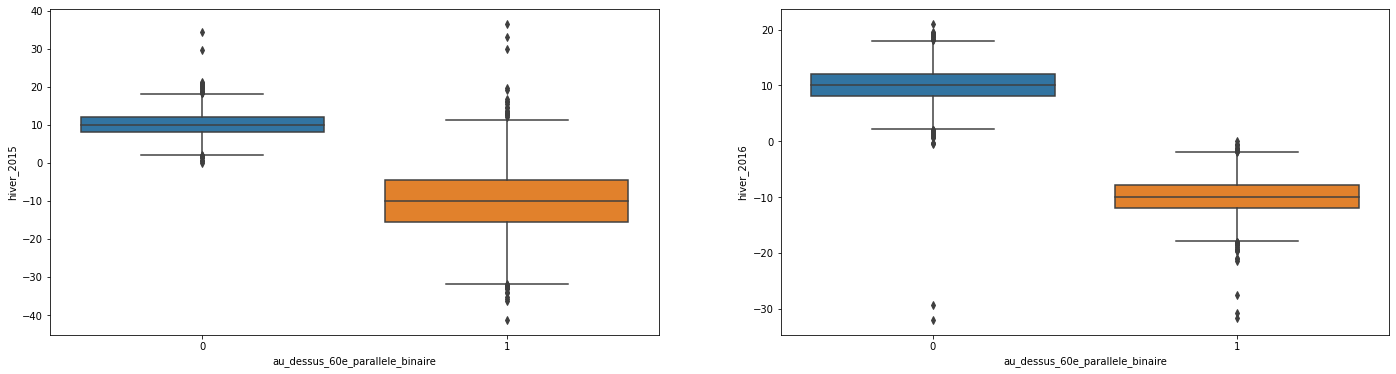

In [149]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
sns.boxplot(x=data1.au_dessus_60e_parallele_binaire, y=data1.hiver_2015,ax=ax1)
sns.boxplot(x=data1.au_dessus_60e_parallele_binaire, y=data1.hiver_2016,ax=ax2)
f.show()

In [150]:
len(data1)*0.2

2001.0

In [151]:
validation_set = data1[:2001]
train_set = data1[2001:]

In [152]:
data2 = train_set[(train_set.hiver_2015<20) &(train_set.hiver_2015>-30) & (train_set.hiver_2016<18) & (train_set.hiver_2016>-18)]

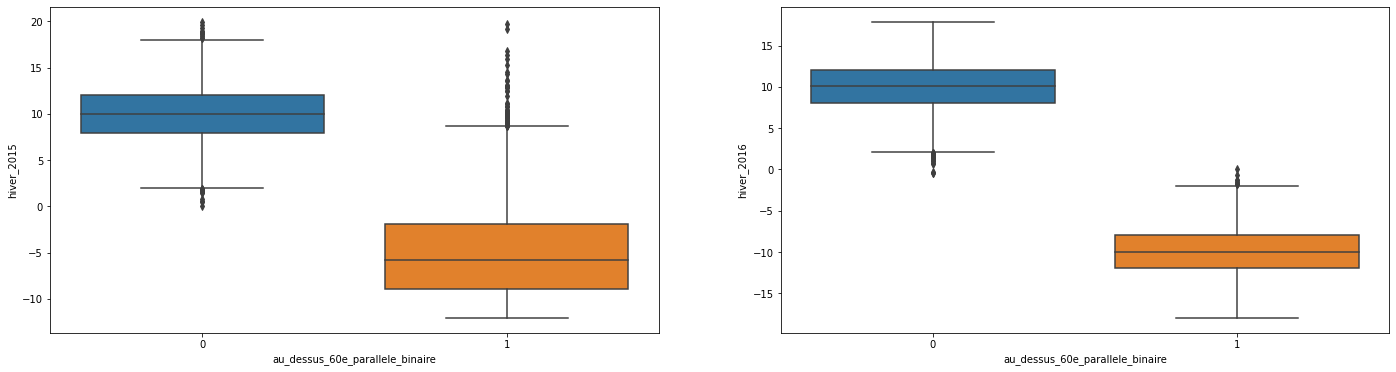

In [153]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
sns.boxplot(x=data2.au_dessus_60e_parallele_binaire, y=data2.hiver_2015,ax=ax1)
sns.boxplot(x=data2.au_dessus_60e_parallele_binaire, y=data2.hiver_2016,ax=ax2)
f.show()

In [154]:
X_train, X_test, y_train, y_test = train_test_split(data2.iloc[:,data2.columns!='au_dessus_60e_parallele_binaire'], 
                                                    data2['au_dessus_60e_parallele_binaire'], test_size=0.2, 
                                                    random_state=42)

In [155]:
scores_cv = []
for model in models:
    scores_cv.append(cross_val_score(models[model], X_train, y_train, cv=5,).mean())

In [156]:
print("Accuracy moyenne cross validation sur le train:")
for i,model in enumerate(models):
    print(f"{model} : {round(scores_cv[i],3)}")

Accuracy moyenne cross validation sur le train:
Logistic Regression : 1.0
Random Forest : 1.0


In [157]:
print("Accuracy sur le test set:")
for model in models:
    model_fit = models[model].fit(X_train,y_train)
    y_pred = model_fit.predict(X_test)
    print(f"{model} : {round(accuracy_score(y_test, y_pred),3)}")

Accuracy sur le test set:
Logistic Regression : 0.999
Random Forest : 1.0


In [158]:
X_val = validation_set.iloc[:,validation_set.columns!='au_dessus_60e_parallele_binaire']
y_val = validation_set.au_dessus_60e_parallele_binaire

In [159]:
validation_set

,hiver_2015,hiver_2016,au_dessus_60e_parallele_binaire
0,-41.348798,-10.681830,1
1,-36.308328,-8.560263,1
2,-35.706947,-7.980804,1
3,-35.223401,-9.267870,1
4,-34.314026,-7.435060,1
...,...,...,...
1996,-12.121142,-11.139094,1
1997,-12.116140,-12.021918,1
1998,-12.110645,-8.180999,1
1999,-12.089478,-10.122159,1


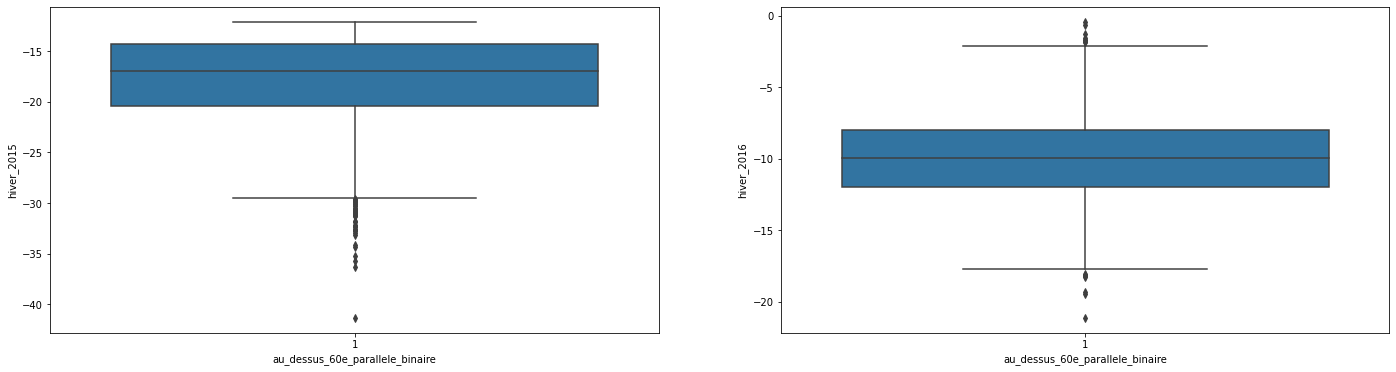

In [160]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
sns.boxplot(x=validation_set.au_dessus_60e_parallele_binaire, y=validation_set.hiver_2015,ax=ax1)
sns.boxplot(x=validation_set.au_dessus_60e_parallele_binaire, y=validation_set.hiver_2016,ax=ax2)
f.show()

In [161]:
print("Accuracy sur le validation set:")
for model in models:
    model_fit = models[model].fit(X_train,y_train)
    y_pred = model_fit.predict(X_val)
    print(f"{model} : {round(accuracy_score(y_val, y_pred),3)}")

Accuracy sur le validation set:
Logistic Regression : 1.0
Random Forest : 1.0


##  <u>2ème Partie :</u> Prédiction du type d’immeuble (haut ou bas) en fonction des coordonnées géographiques et de l’altitude 

L’objectif de cet exercice est d’essayer de prédire si un immeuble est de grande hauteur ou pas en fonction des coordonnées de type GPS (l’unité n’est pas connue). Quand les données ne sont pas connues elles ont été renseignées à 0.<br/><br/>
Pour cela utiliser le fichier : data\data_ex_2.csv<br/><br/>
Les trois questions devront être traitée par deux modèles ensemblistes.


In [205]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [184]:
df = pd.read_csv('data/data_ex_2.csv',delimiter=";",decimal=',')

### a.	Essayer d’obtenir le meilleur modèle en minimisant le taux d’erreur pour chacun des deux algorithmes en jouant sur les données.

In [185]:
df.shape

(6000, 5)

In [186]:
df

,Unnamed: 0,longitude,latitude,altitude,type_habitat
0,4615,1.195212,-2.184525,19,2
1,3915,-1.352191,-2.180299,0,1
2,1213,1.142500,-2.162208,19,2
3,5574,-1.660502,-2.153251,0,1
4,584,-1.899432,-2.124258,0,1
...,...,...,...,...,...
5995,1449,0.965924,2.114656,10,2
5996,5414,-0.558706,2.115647,0,1
5997,3702,-0.705870,2.155908,0,1
5998,1681,-1.419859,2.202217,0,2


In [187]:
df.sort_values("Unnamed: 0")

,Unnamed: 0,longitude,latitude,altitude,type_habitat
5252,0,1.453030,1.528280,12,1
2791,1,-0.599727,-0.148085,0,1
4550,2,-0.064971,1.022435,0,1
5268,3,-0.962616,1.539007,0,1
5889,4,1.520611,1.936212,23,1
...,...,...,...,...,...
5449,5995,1.273288,1.651343,28,1
4719,5996,-0.183237,1.141246,0,2
5313,5997,-2.082577,1.567263,0,2
2121,5998,1.243151,-0.581093,12,1


In [188]:
df = df.drop("Unnamed: 0",axis=1)

In [189]:
df.describe()

,longitude,latitude,altitude,type_habitat
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.000543,0.000784,7.226333,1.375000
std,1.156446,1.155857,10.129719,0.484163
min,-2.193142,-2.184525,0.000000,1.000000
25%,-0.998105,-0.998683,0.000000,1.000000
50%,-0.005440,0.001945,0.000000,1.000000
75%,0.991935,0.991139,16.000000,2.000000
max,2.252093,2.208995,30.000000,2.000000


In [190]:
df.dtypes

longitude       float64
latitude        float64
altitude          int64
type_habitat      int64
dtype: object

In [191]:
df[df==0].count()

longitude          0
latitude           0
altitude        3737
type_habitat       0
dtype: int64

<AxesSubplot:>

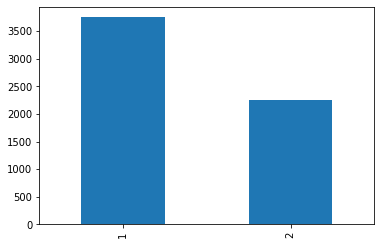

In [196]:
df.type_habitat.value_counts().plot(kind="bar")

In [198]:
df.type_habitat.value_counts()

1    3750
2    2250
Name: type_habitat, dtype: int64

In [199]:
downsampling = df[df.type_habitat==1][:2250]
data = pd.concat([downsampling,df[df.type_habitat==2]])

<AxesSubplot:>

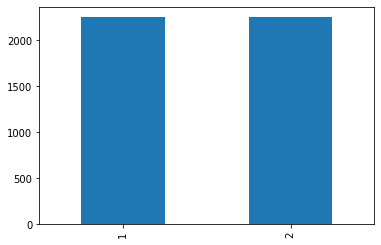

In [200]:
data.type_habitat.value_counts().plot(kind="bar")

In [201]:
data.type_habitat = data.type_habitat - 1

In [194]:
models = {
    'Random Forest':RandomForestClassifier(),
    'Adaboost':AdaBoostClassifier()
}

In [202]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,data.columns!='type_habitat'], 
                                                    data['type_habitat'], test_size=0.2, 
                                                    random_state=42)

In [203]:
scores_cv = []

for model in models:
    scores_cv.append(cross_val_score(models[model], X_train, y_train, cv=5,).mean())
    
print("***"*10)    
print("Taux d'erreur cross validation sur le train set:")
for i,model in enumerate(models):
    print(f"{model} : {round(1 - scores_cv[i],3)}")
    
print("***"*10)   
print("Taux d'erreur sur le test set:")
for model in models:
    model_fit = models[model].fit(X_train,y_train)
    y_pred = model_fit.predict(X_test)
    print(f"{model} : {round(1 - accuracy_score(y_test, y_pred),3)}")

******************************
Taux d'erreur cross validation sur le train set:
Random Forest : 0.044
Adaboost : 0.172
******************************
Taux d'erreur sur le test set:
Random Forest : 0.058
Adaboost : 0.212


### b.	Essayer d’améliorer ces modèles en optimisant leurs paramètres.

In [207]:
params_rf = {'n_estimators':[40,50,60,100],
            'criterion': ['gini', 'entropy'],
             'max_depth':[2,5,None],
             'min_weight_fraction_leaf':[0.,0.3,0.5],
             'max_features': ['auto', 'sqrt', 'log2']
            }
rf_grid = GridSearchCV(RandomForestClassifier(), params_rf)
rf_fit = rf_grid.fit(X_train, y_train)

In [208]:
rf_cv = cross_val_score(rf_fit.best_estimator_,X_train,y_train)

In [209]:
rf_cv.mean()

0.9561111111111111

In [211]:
params_ada = {'n_estimators':[40,50,60,80,100],
             'learning_rate': [0.1,0.3,0.5,0.8,0.9,1.],
            'algorithm': ['SAMME', 'SAMME.R']
            }
ada_grid = GridSearchCV(AdaBoostClassifier(), params_ada)
ada_fit = ada_grid.fit(X_train, y_train)

In [212]:
ada_cv = cross_val_score(ada_fit.best_estimator_,X_train,y_train)

In [213]:
ada_cv.mean()

0.8308333333333333

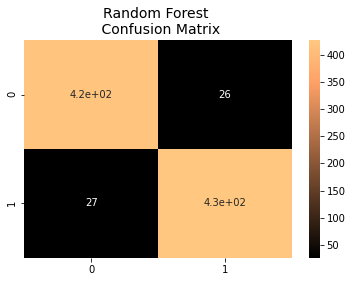

In [214]:
rf_best = rf_fit.best_estimator_.fit(X_train,y_train)
y_pred_rf = rf_best.predict(X_test)
rf_cf = confusion_matrix(y_test, y_pred_rf)
fig = plt.plot(figsize=(22,12))
sns.heatmap(rf_cf, annot=True, cmap=plt.cm.copper)
plt.title("Random Forest \n Confusion Matrix", fontsize=14)

plt.show()

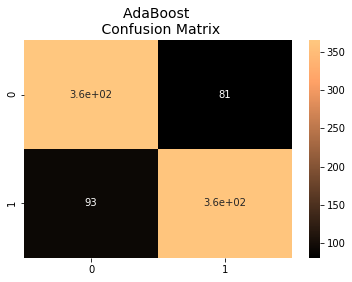

In [215]:
ada_best = ada_fit.best_estimator_.fit(X_train,y_train)
y_pred_ada = ada_best.predict(X_test)
ada_cf = confusion_matrix(y_test, y_pred_ada)
fig = plt.plot(figsize=(22,12))
sns.heatmap(ada_cf, annot=True, cmap=plt.cm.copper)
plt.title("AdaBoost \n Confusion Matrix", fontsize=14)

plt.show()

### c.	Ce qui nous intéresse c’est de ne jamais nous tromper quand on prédit qu’un immeuble est haut. Quel est le meilleur modèle ?

In [217]:
print("Recall:")
print(f"Random Forst recall: {round(recall_score(y_test, y_pred_rf),3)}") 
print(f"AdaBoost recall: {round(recall_score(y_test, y_pred_ada),3)}")    

Recall:
Random Forst recall: 0.941
AdaBoost recall: 0.795


<b> Random Forst est le meilleur pour minimiser l'erreur pour prédir si un immeuble est haut

##  <u>3ème partie :</u> Visualisation de données

L’objectif de cet exercice est de Proposer une synthèse descriptive des données pour le fichier resultats-provisoires-par-canton.txt et resultats-provisoires-par-canton-light.txt (même répertoire)

### a.	Exclure de la visualisation les données 'Code du département','Libellé du département','Code du canton','Libellé du canton' et tout celles qui commencent par 'N°Liste','Libellé Abrégé Liste' ,'Libellé Etendu Liste' ,'Nom Tête de Liste' .

On pourra renommer les colonnes avec la fonction

In [2]:
import re
import unicodedata
def nettoie_text(text):
    if (str(text)!='nan'):
        text = text.strip()
    else :
        text = ''
    text = text.lower()
    text = text.replace(')', ' ')
    text = text.replace('(', ' ')
    text = text.replace(',', ' ')
    text = text.replace('\’', ' ')
    text = text.replace('\'', ' ')
    text = text.replace(';', ' ')
    text = text.replace('\n', ' ')
    text = text.replace('\t', ' ')
    text = text.replace('-', ' ')
    text = text.replace('  ', ' ')
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore') 
    text = text.decode('utf-8')
    text = re.sub('[^A-Z\' a-z 0-9]+', ' ', text)
    text = text.strip()
    return text


In [268]:
df = pd.read_csv('data/resultats-provisoires-par-canton.txt', delimiter = "\t")

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [269]:
df

,Code du département,Libellé du département,Code du canton,Libellé du canton,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,...,Voix 33,% Voix/Ins 33,% Voix/Exp 33,N°Liste 34,Libellé Abrégé Liste 34,Libellé Etendu Liste 34,Nom Tête de Liste 34,Voix 34,% Voix/Ins 34,% Voix/Exp 34
0,1,Ain,1,Ambérieu-en-Bugey,19318,9136,"47,29",10182,"52,71",253,...,0,0,0,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,61,"0,32","0,63"
1,1,Ain,2,Attignat,17843,8967,"50,26",8876,"49,74",278,...,0,0,0,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,0,0,0
2,1,Ain,3,Bellegarde-sur-Valserine,12675,6973,"55,01",5702,"44,99",141,...,0,0,0,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,5,"0,04","0,09"
3,1,Ain,4,Belley,17728,8169,"46,08",9559,"53,92",218,...,0,0,0,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,0,0,0
4,1,Ain,5,Bourg-en-Bresse-1,19562,10335,"52,83",9227,"47,17",163,...,0,0,0,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,9,"0,05","0,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,ZP,Polynésie française,6,AUSTRALES (fictif),5766,3501,"60,72",2265,"39,28",28,...,0,0,0,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,0,0,0
2086,ZS,Saint-Pierre-et-Miquelon,1,Canton fictif,4958,3530,"71,2",1428,"28,8",60,...,1,"0,02","0,08",34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,0,0,0
2087,ZW,Wallis et Futuna,1,1er CANTON,8762,5728,"65,37",3034,"34,63",39,...,0,0,0,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,0,0,0
2088,ZX,Saint-Martin/Saint-Barthélemy,1,1er Canton,23327,19913,"85,36",3414,"14,64",141,...,0,0,0,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,1,0,"0,03"


In [270]:
to_drop = []
l = ['Code du département','Libellé du département','Code du canton','Libellé du canton']
for col in l:
    if col in df.columns:
        to_drop.append(col)  

In [271]:
starts = ['N°Liste','Libellé Abrégé Liste' ,'Libellé Etendu Liste' ,'Nom Tête de Liste' ]
for col in df.columns:
    for start in starts:
        if col.startswith(start):
            to_drop.append(col)

In [272]:
to_drop

['Code du département',
 'Libellé du département',
 'Code du canton',
 'Libellé du canton',
 'N°Liste 1',
 'Libellé Abrégé Liste 1',
 'Libellé Etendu Liste 1',
 'Nom Tête de Liste 1',
 'N°Liste 2',
 'Libellé Abrégé Liste 2',
 'Libellé Etendu Liste 2',
 'Nom Tête de Liste 2',
 'N°Liste 3',
 'Libellé Abrégé Liste 3',
 'Libellé Etendu Liste 3',
 'Nom Tête de Liste 3',
 'N°Liste 4',
 'Libellé Abrégé Liste 4',
 'Libellé Etendu Liste 4',
 'Nom Tête de Liste 4',
 'N°Liste 5',
 'Libellé Abrégé Liste 5',
 'Libellé Etendu Liste 5',
 'Nom Tête de Liste 5',
 'N°Liste 6',
 'Libellé Abrégé Liste 6',
 'Libellé Etendu Liste 6',
 'Nom Tête de Liste 6',
 'N°Liste 7',
 'Libellé Abrégé Liste 7',
 'Libellé Etendu Liste 7',
 'Nom Tête de Liste 7',
 'N°Liste 8',
 'Libellé Abrégé Liste 8',
 'Libellé Etendu Liste 8',
 'Nom Tête de Liste 8',
 'N°Liste 9',
 'Libellé Abrégé Liste 9',
 'Libellé Etendu Liste 9',
 'Nom Tête de Liste 9',
 'N°Liste 10',
 'Libellé Abrégé Liste 10',
 'Libellé Etendu Liste 10',
 'Nom Têt

In [273]:
df = df.drop(to_drop,axis=1)

In [258]:
df_light = pd.read_csv('data/resultats-provisoires-par-canton-light.txt', delimiter = "\t")

In [259]:
df_light

,Unnamed: 0,inscrits,blancs,vot ins,abs ins,blancs ins,voix 5,voix 23,exp vot,exp ins,...,voix exp 5,nuls ins,voix ins 5,votants,nuls,abstentions,nuls vot,blancs vot,exprimes,voix exp 23
0,0,19318,253,"52,71","47,29","1,31",1716,2764,"95,61","50,39",...,"17,63",1,"8,88",10182,194,9136,"1,91","2,48",9735,"28,39"
1,1,17843,278,"49,74","50,26","1,56",1746,2214,"93,85","46,68",...,"20,96","1,5","9,79",8876,268,8967,"3,02","3,13",8330,"26,58"
2,2,12675,141,"44,99","55,01","1,11",1025,1416,"95,23","42,84",...,"18,88","1,03","8,09",5702,131,6973,"2,3","2,47",5430,"26,08"
3,3,17728,218,"53,92","46,08","1,23",1888,2426,"95,38","51,43",...,"20,71","1,26","10,65",9559,224,8169,"2,34","2,28",9117,"26,61"
4,4,19562,163,"47,17","52,83","0,83",2129,1783,"96,5","45,52",...,"23,91","0,82","10,88",9227,160,10335,"1,73","1,77",8904,"20,02"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,2085,5766,28,"39,28","60,72","0,49",1341,214,"93,51","36,73",...,"63,31","2,06","23,26",2265,119,3501,"5,25","1,24",2118,"10,1"
2086,2086,4958,60,"28,8","71,2","1,21",238,313,"91,25","26,28",...,"18,27","1,31","4,8",1428,65,3530,"4,55","4,2",1303,"24,02"
2087,2087,8762,39,"34,63","65,37","0,45",1106,397,"98,19",34,...,"37,13","0,18","12,62",3034,16,5728,"0,53","1,29",2979,"13,33"
2088,2088,23327,141,"14,64","85,36","0,6",631,889,"91,74","13,43",...,"20,15","0,6","2,71",3414,141,19913,"4,13","4,13",3132,"28,38"


In [260]:
to_drop_light = []
l = ['Unnamed: 0','Code du département','Libellé du département','Code du canton','Libellé du canton']
for col in l:
    if col in df_light.columns:
        to_drop_light.append(col)  

In [261]:
starts = ['N°Liste','Libellé Abrégé Liste' ,'Libellé Etendu Liste' ,'Nom Tête de Liste' ]
for col in df_light.columns:
    for start in starts:
        if col.startswith(start):
            to_drop_light.append(col)

In [262]:
to_drop_light

['Unnamed: 0']

In [264]:
df_light = df_light.drop(to_drop_light,axis=1)

### b.	Après avoir conservé uniquement les données générales <font color=blue>( Inscrits, Abstentions, % Abs/Ins, Votants, % Vot/Ins, Blancs, % Blancs/Ins, % Blancs/Vot, Nuls, % Nuls/Ins, % Nuls/Vot, Exprimés, % Exp/Ins, % Exp/Vot)</font> et celles de LOISEAU Nathalie n°5 et de BARDELLA Jordan n°23 <font color=blue>(Voix ,% Voix/Ins ,% Voix/Exp x)</font>, proposer une réduction de dimension afin de visualiser en 2 dimensions les données, avec les points libellés par département.

(Si jamais le traitement a et b vous prenaient trop de temps, utiliser le fichier resultats-provisoires-par-canton-light.txt)<br/><br/>
Essayer d’avoir quelque chose du genre :


<img src="data/visulisation.png" title="visulisation" />